In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

def plot_accuracy_vs_parameters(df, parameters, accuracy_col='accuracy'):
    """
    Plots accuracy as a function of a set of parameters.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot against accuracy.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    for param in parameters:
        plt.figure(figsize=(5, 3))
        sns.lineplot(data=df, x=param, y=accuracy_col, marker='o', ci=None)
        plt.title(f'Accuracy vs {param}')
        plt.xlabel(param)
        plt.ylabel('Accuracy')
        plt.show()

import itertools

def plot_2way_combinations(df, parameters, accuracy_col='accuracy'):
    """
    Plots 2-way combinations of parameters with accuracy as color.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    combinations = list(itertools.combinations(parameters, 2))
    
    for (param1, param2) in combinations:
        plt.figure(figsize=(5, 3))
        scatter = plt.scatter(data=df, x=param1, y=param2, c=accuracy_col, cmap='viridis')
        plt.colorbar(scatter, label='Accuracy')
        plt.title(f'{param1} vs {param2} with Accuracy as Color')
        plt.xlabel(param1)
        plt.ylabel(param2)
        plt.show()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("zadorlab/spatial-transformer-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

summary_df['accuracy'] = 100 * summary_df['eval/accuracy']

# Concatenate the flattened DataFrames along with the 'name' column
runs_df = pd.concat([summary_df, config_df], axis=1)
runs_df.head(15)

,_runtime,_step,_timestamp,eval/accuracy,eval/cell_accuracy,eval/f1_Accessory olfactory bulb,eval/f1_Accessory supraoptic group,eval/f1_Agranular insular area,"eval/f1_Agranular insular area, dorsal part","eval/f1_Agranular insular area, posterior part",...,accelerator_config.even_batches,accelerator_config.non_blocking,accelerator_config.split_batches,accelerator_config.dispatch_batches,accelerator_config.use_seedable_sampler,accelerator_config.gradient_accumulation_kwargs,model.position_encoding_dim,model.position_encoding_type,model.use_relative_positions,model.use_relative_positions2
0,10257.114671,1485.0,1.731972e+09,0.618875,0.604817,0.0,0.0,0.0,0.678700,0.693157,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
1,9721.929546,1485.0,1.731971e+09,0.687037,0.676086,0.0,0.0,0.0,0.688525,0.752381,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
2,9611.132331,1485.0,1.731971e+09,0.795895,0.735025,0.0,0.0,0.0,0.600000,0.956522,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
3,9580.169018,1485.0,1.731971e+09,0.728490,0.707559,0.0,0.0,0.0,0.786885,0.861789,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
4,9397.847028,1485.0,1.731971e+09,0.826484,0.643934,0.0,0.0,0.0,0.500000,0.000000,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
5,11904.634979,1485.0,1.731973e+09,0.506553,0.500258,0.0,0.0,0.0,0.497373,0.644737,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
6,9358.420497,1485.0,1.731971e+09,0.722507,0.696092,0.0,0.0,0.0,0.666667,0.807018,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
7,9407.701877,1485.0,1.731971e+09,0.783105,0.686572,0.0,0.0,0.0,0.857143,0.400000,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
8,12251.227677,1485.0,1.731974e+09,0.361378,0.360621,0.0,0.0,0.0,0.381579,0.462212,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN
9,10883.071256,1485.0,1.731972e+09,0.540527,NaN,0.0,0.0,0.0,0.560811,0.640562,...,True,False,False,NaN,True,NaN,NaN,NaN,NaN,NaN


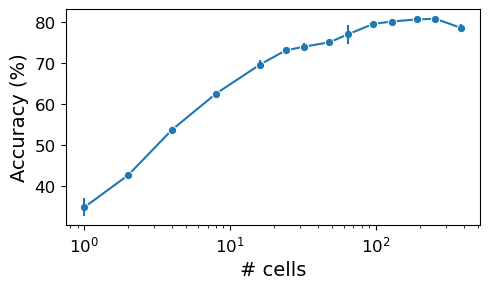

In [3]:

accuracy_col = 'accuracy'


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & \
    ((runs_df['single_cell_augmentation'] == False) | (runs_df['data.group_size'] == 1))

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

# filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True)
# plt.scatter(runs_df[filter_]['data.group_size'], 100*runs_df[filter_][accuracy_col])

# plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
# plt.xlim([.9, 200])
plt.xscale('log')
plt.xlabel("# cells")
plt.ylabel("Accuracy (%)")
plt.tight_layout()
# plt.savefig("../figures/group_size.png")

Text(0, 0.5, 'Accuracy (%)')

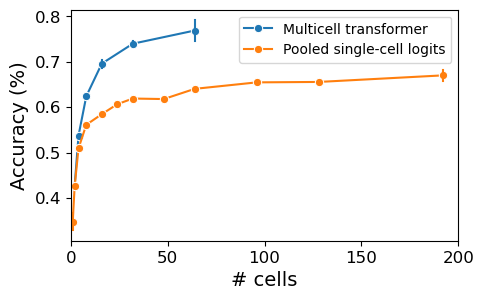

In [4]:
accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['single_cell_augmentation'] == False) & (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True) #& (runs_df['state'] == 'finished')
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
plt.xlim([0, 200])

plt.xlabel("# cells")
plt.ylabel("Accuracy (%)")

Just a plot of pooled single-cell accuracy

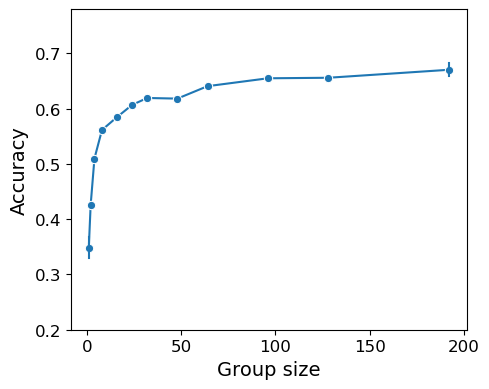

In [5]:


accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)

plt.figure(figsize=(5, 4))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


# plt.legend(['Multicell transformer', 'Pooled single-cell logits'])
# plt.xlim([.9, 200])
# plt.xscale('log')
plt.ylim([.2,.78])
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
# plt.savefig("../figures/group_size_single_cell_pooling.png")

### Train all cells towards their resepctive labels

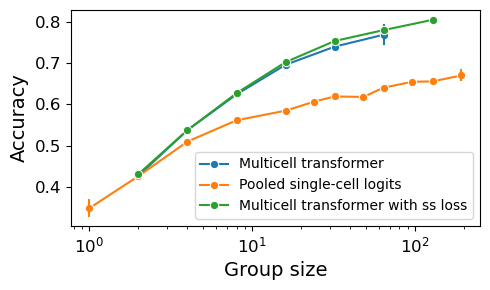

In [6]:


accuracy_col = 'eval/accuracy'

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['single_cell_augmentation'] == False) & (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer', 'Pooled single-cell logits', 'Multicell transformer with ss loss'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_ss_loss.png", dpi=300)

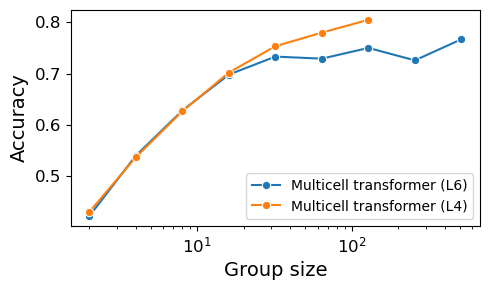

In [3]:


accuracy_col = 'eval/accuracy'

tags = [["group_size_ss_loss_L6"]]
filter_ = runs_df['wandb.tags'].isin(tags) &  (runs_df['state'] == 'finished')

plt.figure(figsize=(5, 3))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer (L6)', 'Multicell transformer (L4)'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("set_depth_acc.png", dpi=300)

Seems not to help much, but maybe a little bit.

Next let's plot the single-cell prediction accuracy for the model trained also on single-cell labels.

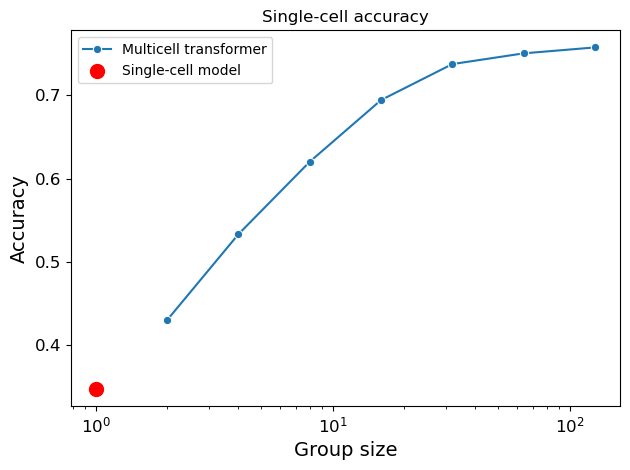

In [7]:

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['data.group_size'] == 1)  & (runs_df['train/epoch'] > 40)
# get average accuracy
single_cell_accuracy = runs_df[filter_]['eval/accuracy'].mean()
# plot as single point at y=single_cell_accuracy, x=1
plt.scatter(1, single_cell_accuracy, color='red', s=100)

plt.legend(['Multicell transformer', 'Single-cell model', ])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Single-cell accuracy")
plt.tight_layout()
plt.savefig("ss_predictions_with_group_size.png", dpi=300)


### Using relative locations of the cells from the centroid

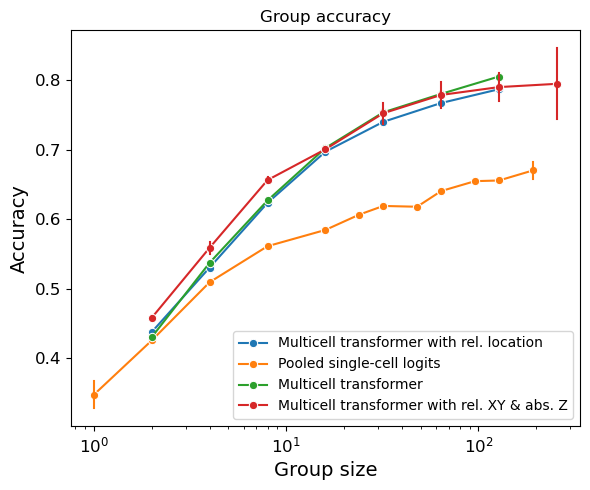

In [10]:


accuracy_col = 'eval/accuracy'

tags = [["group_size_rel_pos"]]
filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)

plt.figure(figsize=(6, 5))
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['model.detach_single_cell_logits'] == True) & (runs_df['single_cell_augmentation'] == True)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")


tags = [["group_size_rel_pos_absZ"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer with rel. location', 'Pooled single-cell logits', 'Multicell transformer', 'Multicell transformer with rel. XY & abs. Z'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Group accuracy")
plt.tight_layout()
plt.savefig("group_predictions_with_rel_pos.png", dpi=300)


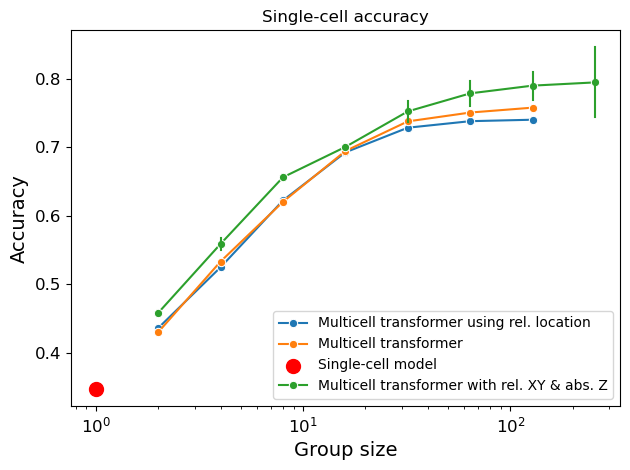

In [11]:



tags = [["group_size_rel_pos"]]
filter_ = runs_df['wandb.tags'].isin(tags) #& (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")

tags = [["group_size_ss_loss"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


tags = [["group_size"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['data.group_size'] == 1)  & (runs_df['train/epoch'] > 40)
# get average accuracy
single_cell_accuracy = runs_df[filter_]['eval/accuracy'].mean()
# plot as single point at y=single_cell_accuracy, x=1
plt.scatter(1, single_cell_accuracy, color='red', s=100)



tags = [["group_size_rel_pos_absZ"]]
filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['train/epoch'] > 40)
sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, marker='o', errorbar="sd", err_style="bars")

plt.legend(['Multicell transformer using rel. location',  'Multicell transformer', 'Single-cell model',  'Multicell transformer with rel. XY & abs. Z'])
plt.xscale('log')
plt.xlabel("Group size")
plt.ylabel("Accuracy")
plt.title("Single-cell accuracy")
plt.tight_layout()
plt.savefig("ss_predictions_with_rel_pos.png", dpi=300)


<Axes: xlabel='data.group_size', ylabel='eval/cell_accuracy'>

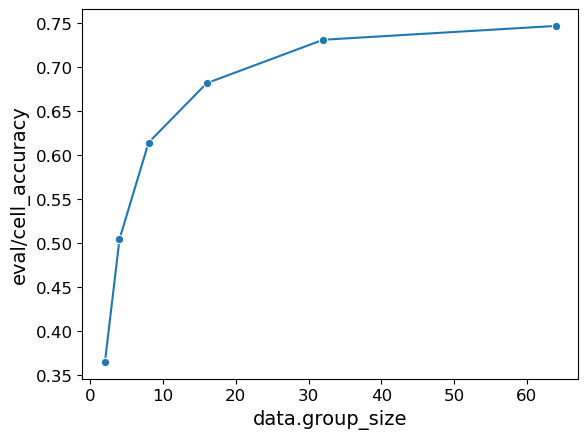

In [6]:

tags = [["group_size_class_weights"]]
filter_ = runs_df['wandb.tags'].isin(tags)
sns.lineplot(runs_df[filter_], x='data.group_size', y='eval/cell_accuracy', marker='o', errorbar="sd", err_style="bars")


Why is it better than pooled single-cell logits?
- think of a shuffled control 

Are certain cells more informative than others?
 1) Assume that H3_types are the equivalent as these types, and stratify performance by H3_types
 2) Bootstrap the pooling (resample) 

Do cells contain independent information about the labels?
- Pool within vs. across cell types. Is there a difference in improvement?


Application: alignment between two brains. A distrance metric between two brains
 - with smoothness constraint
 - ideal for comparing two brains with different conditions

Building a new atlas...